# Comparing rainy weather across cities in the continental U.S.A.
##### Author: John Mays
## Setup:

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
# the code from this notebook has been moved to this .py file:
import city_comparison_helpers as cch
import schema
import plot_utils

The question here is, what cities should I consider?  The more cities I consider, the more data I'd have to download.  If I downloaded the **GSOY** CSV for every one of the 83,000 or so weather stations that are listed, I'd have to download ~16GB of CSVs (a rough and likely low estimate).  If I wanted to bring in some big data technologies, I could do it, but I don't. So, should I...
- get a list of cities commonly considered rainy and find one weather station per city?
- get one weather station for every "big" city in the U.S.
- get all of the weather stations in a few states?

Although it's not perfect, I will likely go with the first option

##### What cities did I land on?
- I looked for weather stations near both small towns and big cities commonly considered rainy.  So that means bigger cities like C

In [2]:
schema.city_schema.head()

,City,State,Station,Size
0,Seattle,WA,USW00094290,City
1,Miami,FL,USW00012839,City
2,New York City,NY,USW00094728,City
3,White Plains,NY,USW00094745,City
4,Brookhaven,NY,USW00054790,Town


In [3]:
schema.partial_GSOY_schema
# cch.partial_schema.loc["DYHF"]

,Description
Column,
DATE,year AD
LATITUDE,
LONGITUDE,
PRCP,total annual precipitation in inches
SNOW,total annual snowfall in inches
DYFG,number of days with fog
DYHF,number of days with 'heavy' fog
DYTS,number of days with thunderstorms
EMXP,highest daily total of precipitation in inches


In [4]:
# range of years I'm looking at:
rng = (2011, 2021) # (inclusive)

In [5]:
cch.check_years(schema.city_schema, rng=rng)

There are no missing years in the data.


In [6]:
columns = list(schema.partial_GSOY_schema.index.to_series())

In [7]:
cities = cch.total_concat(schema.city_schema, columns, rng=rng)

## Looking at statistics:
### Adding a few columns:

In [8]:
cities["SNPR"] = cities["SNOW"].fillna(0.0) \
+ cities["PRCP"]

### Finding mean and median over an 11 year time period (2012-2022)

In [9]:
grouped_median = cities.groupby('CITY').median()
grouped_mean = cities.groupby('CITY').mean()

### Looking at some ranked lists and numbers:

#### Two ways of measuring precipitation
1. Annual rainfall sum
2. number of days with (any amount of) rain per year

In [10]:
cch.series_comparison(grouped_median["PRCP"].sort_values(ascending=False),
                  grouped_median["DP01"].sort_values(ascending=False),
                  titles = ["Rainfal per year (mm)", "Number of days with any rainfall"])

Rainfal per year (mm)     | Number of days with any rainfall
CITY                      | CITY
Annette           3826.20 | Annette           237.0
Forks             3090.30 | Forks             231.0
Quillayute        2727.50 | Quillayute        200.0
Aberdeen          2310.50 | Astoria           199.0
Astoria           1851.90 | Aberdeen          195.0
Hoquiam           1829.80 | Hoquiam           185.0
New Orleans       1734.50 | Rochester         179.5
Miami             1676.00 | Syracuse          177.0
Port Arthur       1669.20 | Seattle           176.0
West Palm         1502.70 | Erie              175.0
Norton            1405.80 | Buffalo           167.0
Houston           1293.00 | Presque Isle      163.0
Woods Hole        1199.90 | Cleveland         163.0
New York City     1177.30 | Brassau Dam       162.0
Lake Jackson      1172.20 | Norton            162.0
Cincinnati        1166.30 | Portland          157.0
Pittsburgh        1122.70 | Pittsburgh        157.0
Chicago           1120

#### Two ways of measuring snow
1. Annual snowfall sum
2. number of days with (any amount of) snow per year

In [11]:
cch.series_comparison(grouped_median["SNOW"].sort_values(ascending=False),
                  grouped_median["DSNW"].sort_values(ascending=False),
                  titles = ["Snowfall per year (mm)", "Number of days with any snowfall"])

Snowfall per year (mm)   | Number of days with any snowfall
CITY                     | CITY
Presque Isle      3161.0 | Driggs            42.0
Driggs            3145.0 | Syracuse          32.0
Syracuse          2840.0 | Presque Isle      31.0
Brassau Dam       2594.0 | Brassau Dam       27.0
Erie              2303.0 | Buffalo           25.0
Rochester         2266.0 | Erie              24.0
Buffalo           2088.0 | Rochester         23.5
Boston            1275.0 | Cleveland         17.0
Cleveland         1177.0 | Madison           14.0
Chicago           1072.5 | Spokane           14.0
Spokane            989.0 | Chicago           13.0
Detroit            980.0 | Detroit           12.0
Madison            956.0 | Boston            11.0
Norton             886.0 | Norton            10.5
New York City      880.0 | Columbus           9.0
Columbus           643.0 | West Lafayette     7.0
West Lafayette     489.0 | New York City      7.0
Woods Hole         429.5 | Woods Hole         6.0
Portland

#### Total mm of Precipitation (snow & everything else):

In [12]:
# grouped_median["SNPR"] = grouped_median["SNOW"].fillna(0.0) \
# + grouped_median["PRCP"]
# grouped_mean["SNPR"] = grouped_mean["SNOW"].fillna(0.0) \
# + grouped_mean["PRCP"]
grouped_median["SNPR"].sort_values(ascending=False)

CITY
Presque Isle      4278.70
Syracuse          4008.80
Driggs            3840.00
Annette           3826.20
Brassau Dam       3543.80
Erie              3464.20
Rochester         3154.25
Buffalo           3090.70
Forks             3090.30
Quillayute        2727.50
Boston            2398.60
Cleveland         2311.10
Aberdeen          2310.50
Chicago           2218.80
Norton            2060.40
New York City     2024.70
Detroit           1990.80
Columbus          1882.30
Astoria           1851.90
Hoquiam           1829.80
New Orleans       1734.50
Miami             1676.00
Port Arthur       1669.20
West Palm         1502.70
West Lafayette    1419.70
Spokane           1346.90
Houston           1318.00
Woods Hole        1268.40
Seattle           1180.10
Lake Jackson      1172.20
Cincinnati        1166.30
Portland          1165.10
Madison           1156.50
Pittsburgh        1122.70
Brookhaven        1083.80
White Plains      1066.05
Conneaut           798.40
Dunkirk            762.10
San Fra

#### Fog compared to Rain (median of `DYFG` & `DPO1`)

In [13]:
cch.series_comparison(grouped_median["DYFG"].sort_values(ascending=False),
                  grouped_median["DP01"].sort_values(ascending=False),
                  titles = ["Median number of foggy days", "Median number of rainy days"])

Median number of foggy days | Median number of rainy days
CITY                        | CITY
Hoquiam           286.0     | Annette           237.0
Quillayute        270.0     | Forks             231.0
Cincinnati        245.0     | Quillayute        200.0
Astoria           240.0     | Astoria           199.0
Lake Jackson      232.0     | Aberdeen          195.0
Annette           222.0     | Hoquiam           185.0
Port Arthur       213.0     | Rochester         179.5
Monterey          180.0     | Syracuse          177.0
Columbus          176.0     | Seattle           176.0
Presque Isle      171.0     | Erie              175.0
Syracuse          168.0     | Buffalo           167.0
New Orleans       161.0     | Presque Isle      163.0
Houston           157.0     | Cleveland         163.0
Cleveland         156.0     | Brassau Dam       162.0
Buffalo           156.0     | Norton            162.0
Erie              146.0     | Portland          157.0
New York City     142.0     | Pittsburgh   

#### Days with thunderstorms:

In [14]:
grouped_mean["DYTS"].sort_values(ascending=False)

CITY
West Palm         89.727273
New Orleans       80.363636
Miami             78.090909
Lake Jackson      67.000000
Port Arthur       64.272727
Houston           58.363636
Chicago           44.636364
Norton            41.000000
Columbus          39.909091
Cleveland         37.272727
Cincinnati        32.750000
Buffalo           28.181818
New York City     28.000000
Rochester         26.545455
Erie              26.000000
Syracuse          24.090909
White Plains      17.111111
Presque Isle      16.200000
Boston            15.909091
Dunkirk           13.500000
Pittsburgh        13.125000
Spokane           12.909091
Conneaut          12.800000
Astoria            7.500000
Quillayute         7.222222
Richland           6.818182
Brassau Dam        6.750000
Forks              5.363636
Hoquiam            5.000000
Seattle            4.700000
Brookhaven         3.333333
Monterey           2.500000
Annette            2.000000
West Lafayette     1.400000
Aberdeen                NaN
Detroit        

- Apparently in the South, when it rains, it storms. Not so much in the North.
- The underlying relationship, it seems, is that the cities with the most thunderstorms are closest to the Gulf of Mexico
- On the other side of that, cities on the West Coast have very few.

## Plotting the Cities:

In [15]:
usa = gpd.read_file("../data/map/US_State_Boundaries.geojson")

# range for U.S. w/o Alaska: 
longitude_range = (-127, -66)
latitude_range = (23.5, 50)

degrees_per_inch = 2.5

width = ((longitude_range[1] - longitude_range[0]) / degrees_per_inch) + 2
# the (+ 2 is to accomodate for the colorbar)
height = (latitude_range[1] - latitude_range[0]) / degrees_per_inch

In [16]:
grouped_median["SIZE"] = 800 * ((grouped_median["DP01"]-(0.5*grouped_median["DP01"].min()))/grouped_median["DP01"].max())


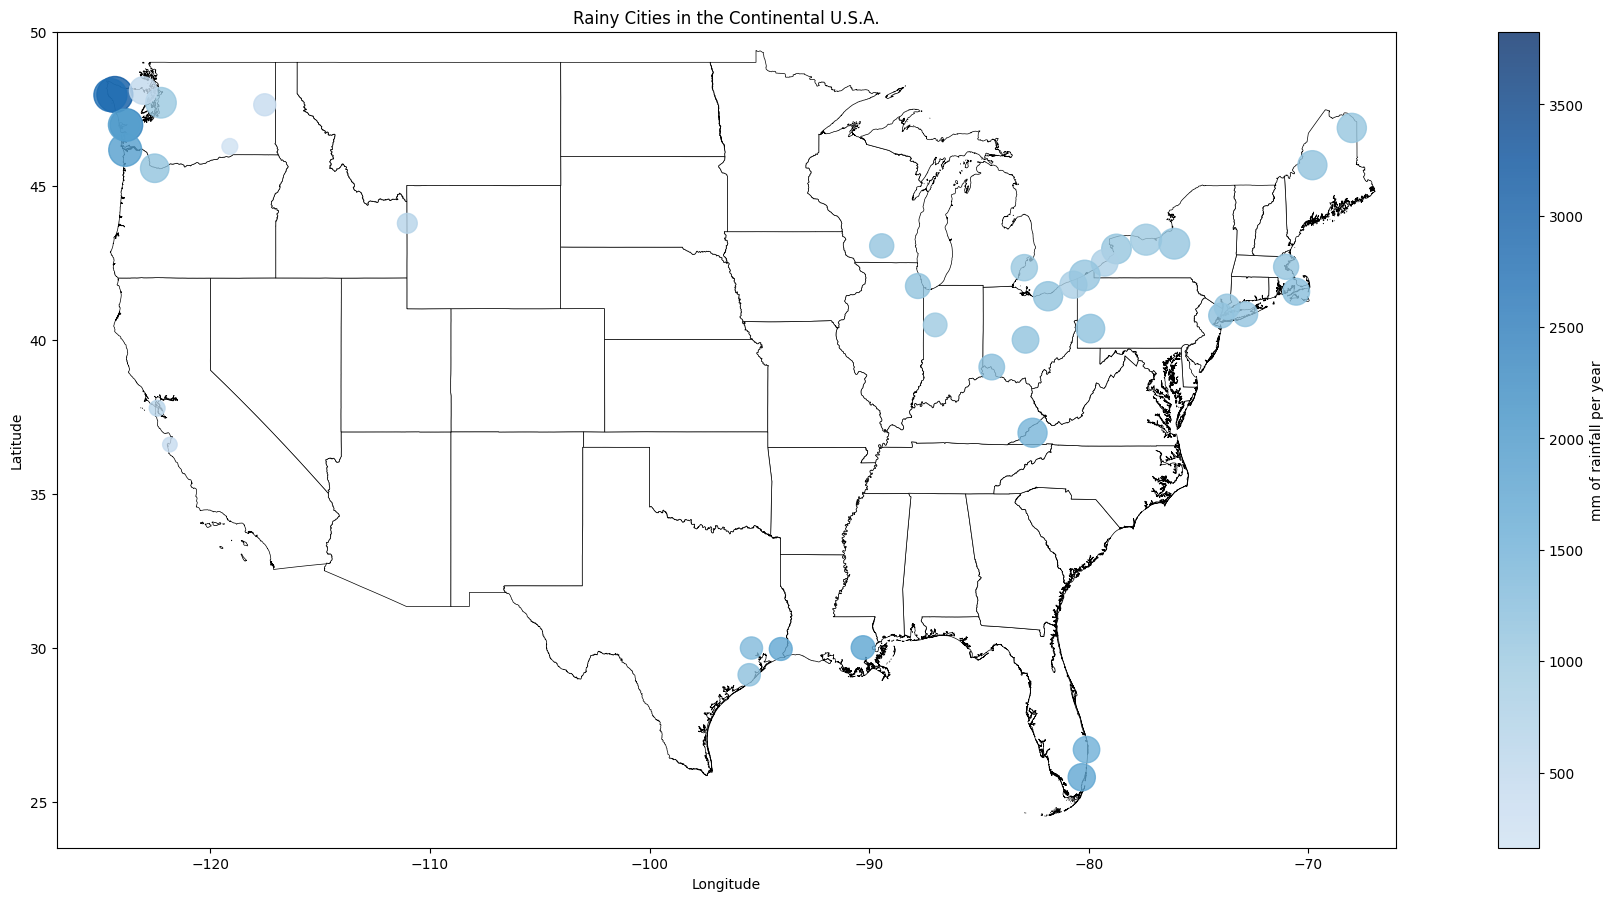

In [17]:
usa.plot(color="white", edgecolor="black", linewidth=0.5,
         figsize=(width, height))
plt.scatter(grouped_median["LONGITUDE"], grouped_median["LATITUDE"],
            alpha = 0.8, s = grouped_median["SIZE"],
            c=grouped_median["PRCP"], cmap=plot_utils.Blues_subsection)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.xlim(longitude_range)
plt.ylim(latitude_range)
plt.title("Rainy Cities in the Continental U.S.A.")
plt.colorbar(label="mm of rainfall per year")
plt.show()

# Issues
- **Weather station may not be representative of entire city:** Especially with measurements like days with fog, which is a spotty phenomenon, you could be living somewhere around a city, but just not close enough to the weather station to see what they report.  For example, in Cleveland, if you live a few miles from Lake Erie, you will be much less likely to see fog than the weather station close to Lake Erie.  
- Also, in an ideal world, I would attempt to take measurements from several weather stations and aggregate them somehow to be more representative of a general area.  Although, since there are quite a few small towns with relatively sparse data available, I'm not so sure that would be smart.
- **Sample size:** I am only sampling 2011-2021 here, 11 years.  I wish I could sample back into the 70's or so, but there are too many fragmented datasets to pick a larger range, so 11 years of data will have to do.  If I am curious about comparing a few cities furthere, I may use Global Summary of the Month (**GSOM**) data to look further.
- **You may be tempted to say a city on here is "high" or "low" compared to others,** however, this dataset was hand-selected and is skewed towards notoriously rainy places, so it wouldn't really be honest to say "Lafayette gets low rain" because it is only being compared to the upper echelon of rainy places in the USA.